# Telco Customer Churn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = "/Users/kaveenaiyappa/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls"

data1 = pd.read_csv(data)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data1["TotalCharges"] = data1["TotalCharges"].replace(" ","0")
data1["TotalCharges"] = data1["TotalCharges"].astype("float")

Replacing blanks with zero as tenure is 0 and no total charges are recorded

In [9]:
data1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
data1["customerID"].duplicated().sum()

0

In [48]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
    
data1["SeniorCitizen"] =data1["SeniorCitizen"].apply(conv)    

Coverted the values of Senior Citizen to make it more understandable

In [49]:
data1.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

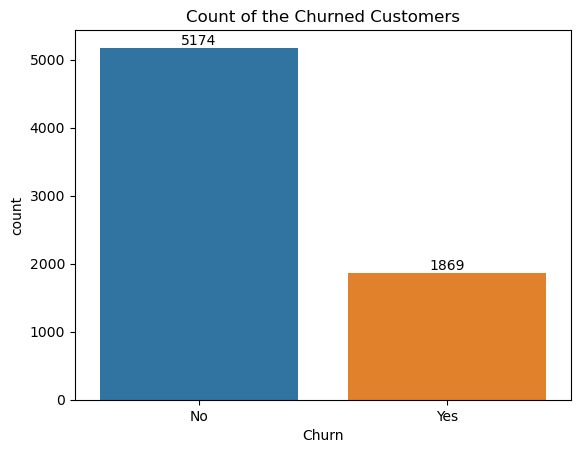

In [50]:
ax =sns.countplot(x="Churn", data=data1)
plt.title("Count of the Churned Customers")
ax.bar_label(ax.containers[0])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

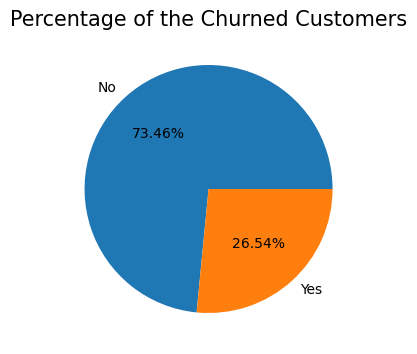

In [51]:
plt.figure(figsize=(4,5))
gb = data1.groupby("Churn").agg({"Churn" : "count"})
plt.pie(gb["Churn"],labels = gb.index,autopct ="%1.2f%%")
plt.title("Percentage of the Churned Customers",fontsize= 15)
plt.show()

From the given Pie chart, we can conclude that 26.54% has been churned out. Now, let's understand the reason behind this!

<IPython.core.display.Javascript object>

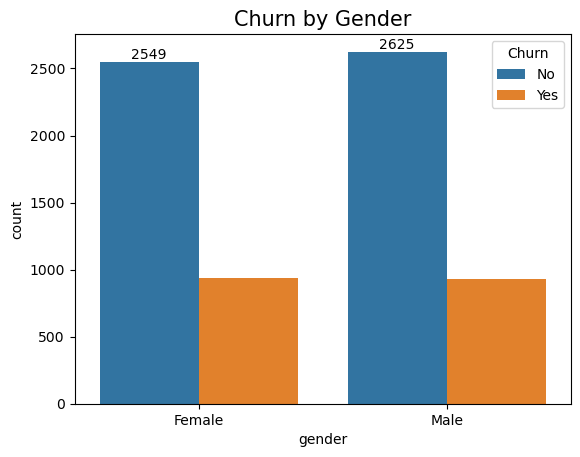

In [52]:
bx =sns.countplot(data1["gender"],data=data1, hue= "Churn")
bx.bar_label(bx.containers[0])
plt.title("Churn by Gender", fontsize= 15)


ff= data1.groupby("gender").agg({"gender" : "count"})

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x7f7a22575520>,
 [Text(0.016436707732256514, 1.0998771907076375, 'Female'),
  Text(-0.01643670773225665, -1.0998771907076375, 'Male')],
 [Text(0.00896547694486719, 0.5999330131132566, '49.52%'),
  Text(-0.008965476944867263, -0.5999330131132566, '50.48%')])

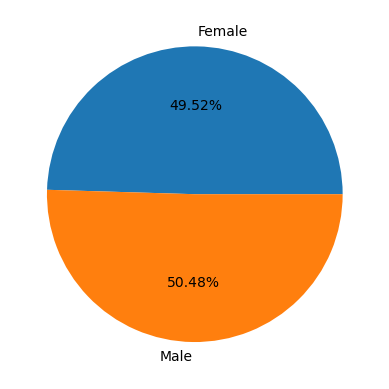

In [53]:
ff= data1.groupby("gender").agg({"gender" : "count"})
plt.pie(ff["gender"],labels= ff.index, autopct = "%1.2f%%")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

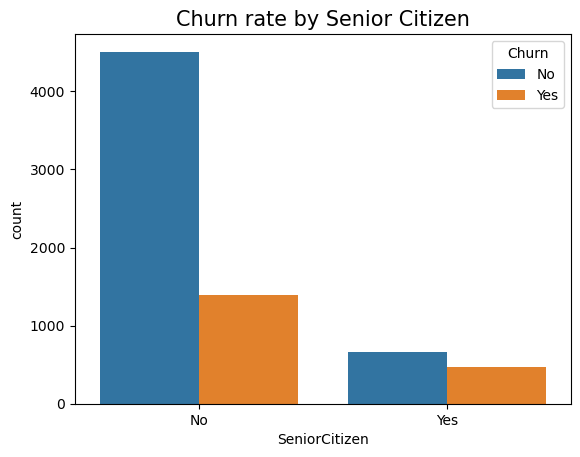

In [54]:
sns.countplot(x="SeniorCitizen",data=data1, hue="Churn")
plt.title("Churn rate by Senior Citizen", fontsize=15)
plt.show()

In [61]:
total_counts = data1.groupby('SeniorCitizen')["Churn"].value_counts(normalize=True).unstack()
total_counts

Churn,No,Yes
SeniorCitizen,,
No,0.763938,0.236062
Yes,0.583187,0.416813


In [ ]:
fig, ax = plt.subplot(figsize=(6,6))

total_counts = data1.groupby('SeniorCitizen')["Churn"].value_counts(normalize=True).unstack()

total_counts.plot(kind= "bar",stacked = True, ax =ax,color = []




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

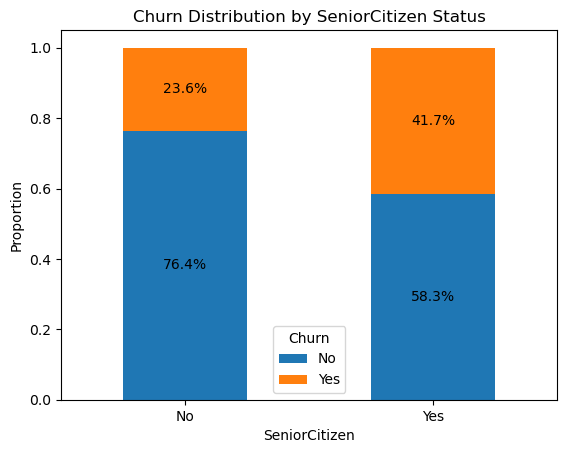

In [64]:
total_counts = data1.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# Plotting the data as a barplot
ax =total_counts.plot(kind='bar', stacked=True)

# Adding percentage labels
for p in ax.patches:
    width = p.get_width()    # bar width
    height = p.get_height()  # bar height
    x, y = p.get_xy()        # bar's starting point
    
    # Only label bars with height (percentage > 0)
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height*100:.1f}%', ha='center', va='center')


# Adding labels and title
plt.title('Churn Distribution by SeniorCitizen Status')
plt.xlabel('SeniorCitizen')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn')

# Display the plot
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

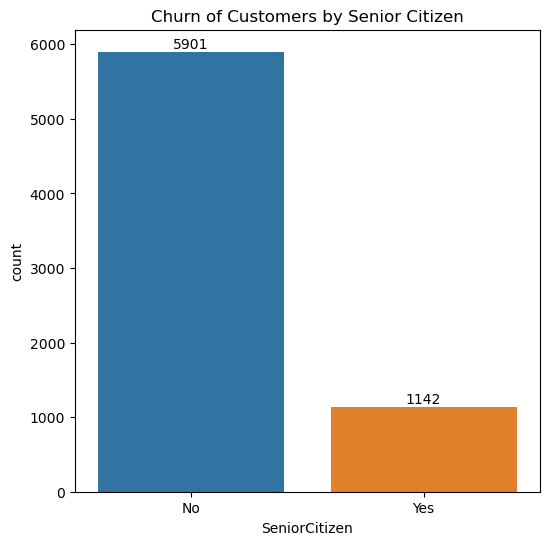

In [67]:
#To understand how much percentage of Senior Citizens exist

plt.figure(figsize=(6,6))
dx = sns.countplot(x="SeniorCitizen", data=data1)

dx.bar_label(dx.containers[0])
plt.title("Churn of Customers by Senior Citizen")
plt.show()

#Comparatively a great number of Senior Citizens are churned out!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

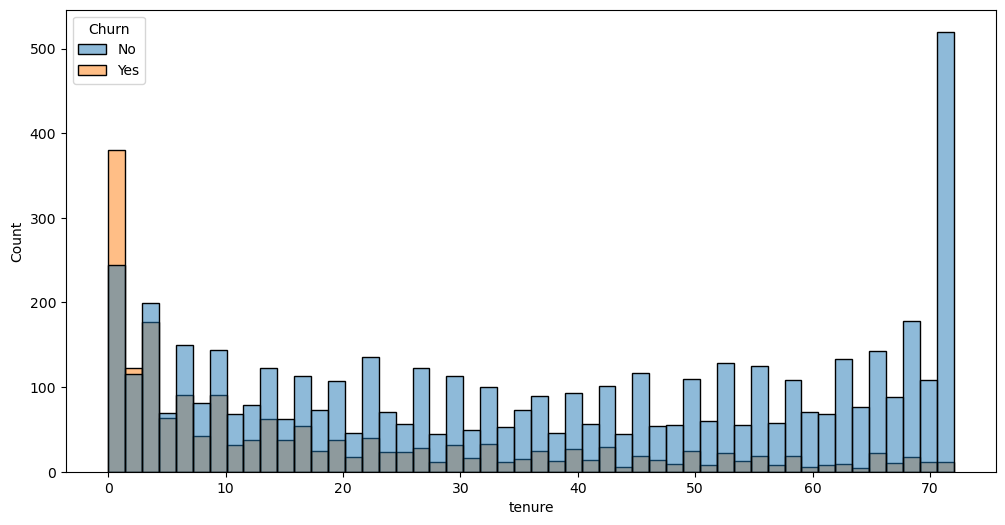

In [76]:
plt.figure(figsize=(12,6))
sns.histplot(x="tenure",data= data1, bins=50,hue="Churn")
plt.show()


People who have used our services have stayed for a long period of time and people who have used our services have churned out within a month or two

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

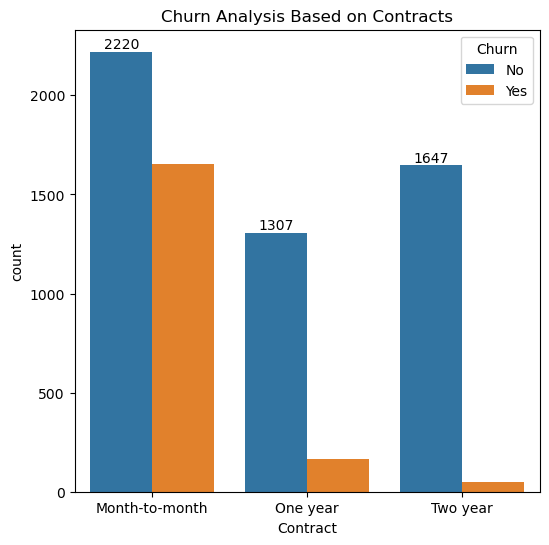

In [81]:
plt.figure(figsize=(6,6))
fx=sns.countplot(x="Contract", data=data1, hue="Churn")
fx.bar_label(fx.containers[0])
plt.title("Churn Analysis Based on Contracts")
plt.show()

We can conclude that people who have Month-to-Month contract are likely to churn when compared to the rest!

In [82]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

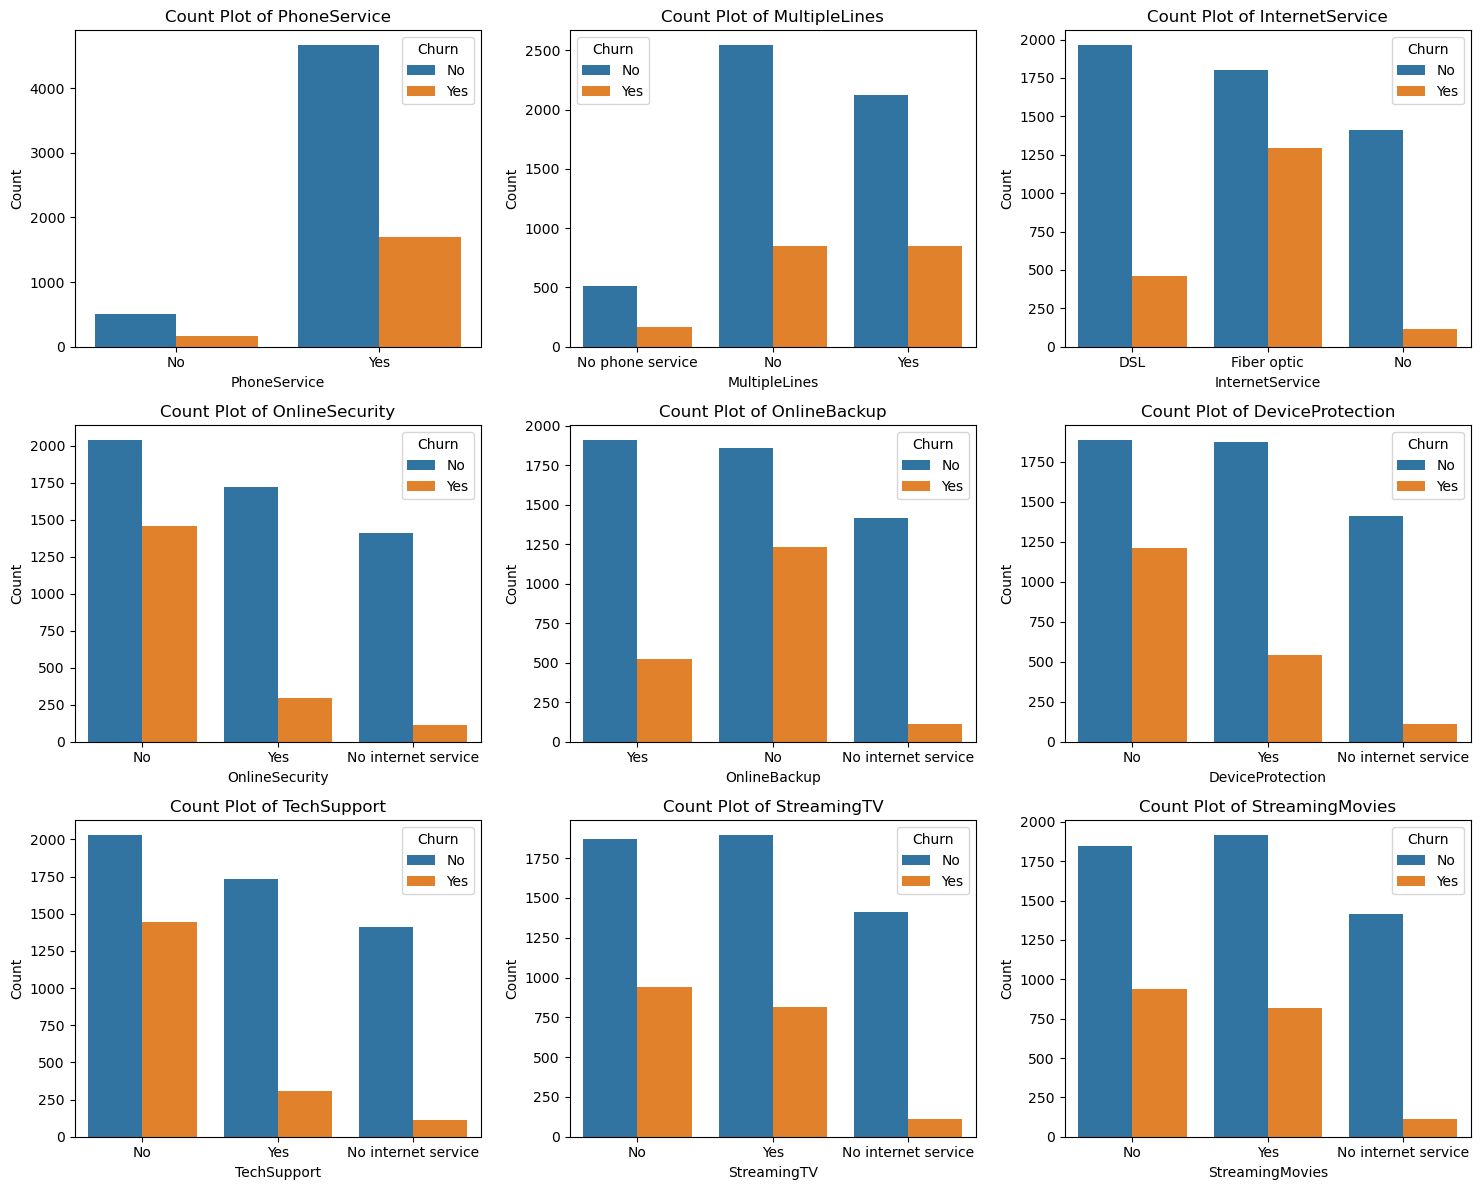

In [99]:
# List of columns for which we want to create count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) # Adjust figsize as needed
# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()


#Iterate over columns and plot countplots
for i , col in enumerate(columns):
    sns.countplot(x=col,data=data1,ax=axes[i], hue="Churn"),
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    
    
# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[i]) 
    
    
    
plt.tight_layout()
plt.show()
    

The majority of the customers who do not churn tend to have services like Internet Services(Particulary DSL), Phone Services and OnlineSecurit Enabled. The remaining services like TechSupport,
StreamingTV and OnlineBackup where the churn rates are noticeably higher when these services are not used.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

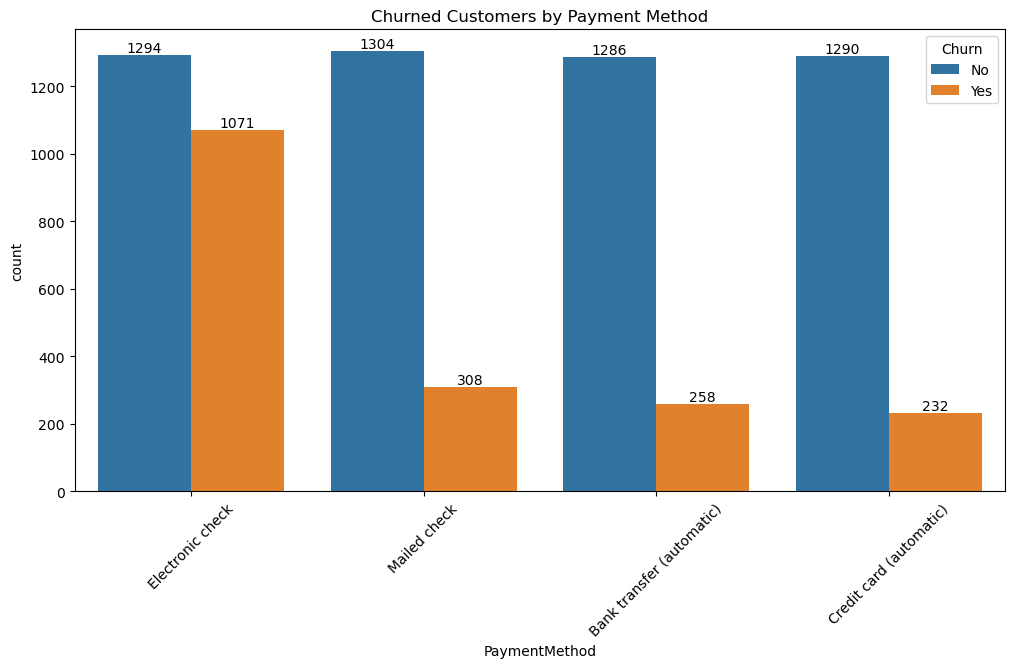

In [103]:
plt.figure(figsize=(12,6))
sx =sns.countplot(x="PaymentMethod", data=data1, hue="Churn")
sx.bar_label(sx.containers[0])
sx.bar_label(sx.containers[1])
plt.xticks(rotation =45)
plt.title("Churned Customers by Payment Method")
plt.show()

Customer is likely to churn when he/she is using the electronic cheque as the payment method